# We will simulate the cross-sectional spatial lag result.    
    Y = [Rent burdened, Rent overburdened, Median rent, Median house price]
    X = [Percent Airbnb, Weighted Airbnb listings]

In [1]:
import numpy as np
#%matplotlib notebook
import itertools as it
import matplotlib.pyplot as plt
from math import e, log
import operator

In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [6]:
Y_names = ['Rent burdened', 'Rent overburdened', 'Median rent', 'Median house price']
Y_means = [3.7518, 2.97587, 7.3223, 13.06562]       # these are for log values

X_names = ['Percent Airbnb', 'Weighted Airbnb listings']
X_means = [10.27940, 15.48]                         # these are for normal values
X_std   = [17.54471, 30.67383]                      # these are for normal values

percentiles      = [0, 10, 25, 50, 75, 90, 100] 
X_percentiles    = [[], []]
X_percentiles[0] = [0.304878, 1, 1, 2.631579, 12.95846, 27.21591, 100]
X_percentiles[1] = [0.5, 0.5, 0.8, 1, 14.5, 52, 282.5]

YX_names = list(it.product(Y_names, X_names))
YX_means = list(it.product(Y_means, X_means))
X_std    = 4*X_std

print(YX_names)

coeffs = [0.001, 0.021,
          0.026, 0.013,
          0.071, 0.142,
          0.181, 0.223]     # these are for log-log values

c = [YX_means[i][0] - coeffs[i]*log(YX_means[i][1]) for i in range(8)]
k = [e**i for i in c]
k

[('Rent burdened', 'Percent Airbnb'), ('Rent burdened', 'Weighted Airbnb listings'), ('Rent overburdened', 'Percent Airbnb'), ('Rent overburdened', 'Weighted Airbnb listings'), ('Median rent', 'Percent Airbnb'), ('Median rent', 'Weighted Airbnb listings'), ('Median house price', 'Percent Airbnb'), ('Median house price', 'Weighted Airbnb listings')]


[42.49854576740567,
 40.21618287778283,
 18.454095253094064,
 18.92068682909221,
 1282.876274744788,
 1025.8574318063145,
 309856.4229644157,
 256452.97729472799]

/home/vaibhav/.anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


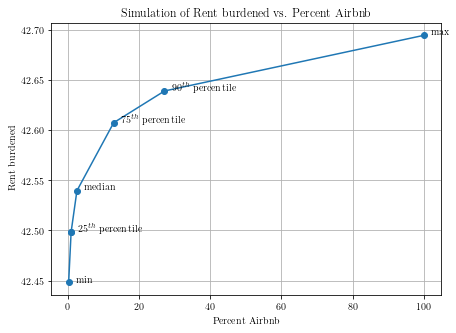

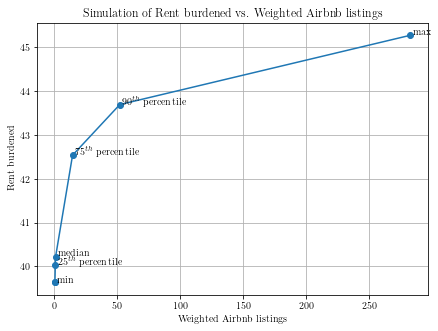

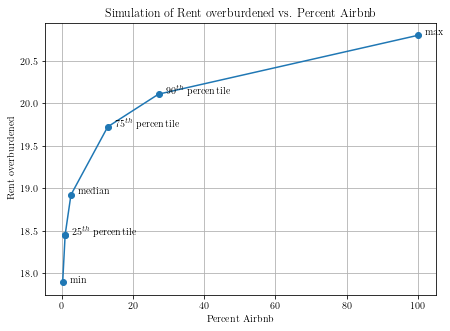

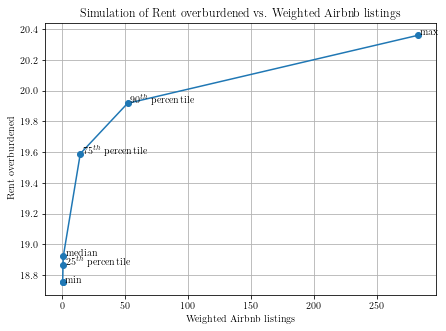

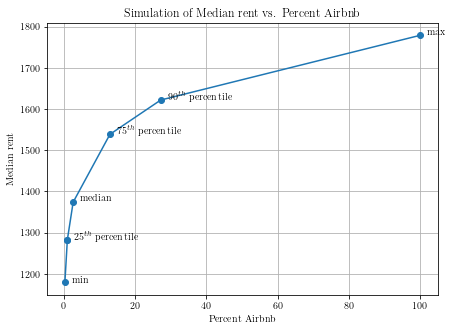

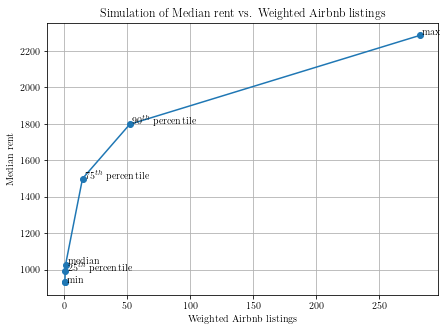

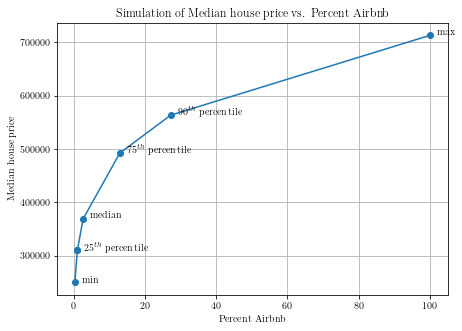

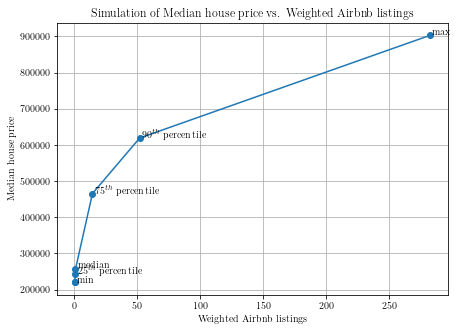

In [7]:
def y(i, x): return k[i]*x**coeffs[i]


texts = [r'min',
         r'', #r'$10^{th}$ percentile',
         r'$25^{th}$ percentile',
         r'median',
         r'$75^{th}$ percentile',
         r'$90^{th}$ percentile',
         r'max']

for i in range(8):
    xs  = X_percentiles[i%2] #[YX_means[i][1] + j*(X_std[i]) for j in range(0,4)]
    ys  = [y(i,x) for x in xs]
    
    fig = plt.figure(figsize=(7,5))
    ax  = fig.add_subplot(111)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.plot(xs, ys, 'o-')
    
    text_pos = [(xs[0] + 2,ys[0] + 0),
                (xs[1] + 2,ys[1] - 0),
                (xs[2] + 2,ys[2] - 0),
                (xs[3] + 2,ys[3] - 0),
                (xs[4] + 2,ys[4] + 0),
                (xs[5] + 2,ys[5] + 0),
                (xs[6] + 2,ys[6] + 0)]
    [ax.annotate(texts[j], xy = text_pos[j]) for j in range(7)]
    
    
    plt.ylabel(YX_names[i][0])
    plt.xlabel(YX_names[i][1])
    plt.grid(True)
    plt.title('Simulation of {} vs. {}'.format(*YX_names[i]))
    plt.savefig('{}_vs_{}.png'.format(*YX_names[i]), dpi=300)